MALIGNANT COMMENTS CLASSIFICATION
1. Problem Definition The problem we will be exploring is binary classification. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

2. Data All of the dataset values were provided by a client.

3. Evaluation Evaluating a models predictions using problem-specific evaluation metrics

4. Features The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. The data set includes:

Malignant:
    It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.

Highly Malignant:
    It denotes comments that are highly malignant and hurtful.

Rude:
    It denotes comments that are very rude and offensive.

Threat:
    It contains indication of the comments that are giving any threat to someone.

Abuse:
    It is for comments that are abusive in nature.

Loathe:
    It describes the comments which are hateful and loathing in nature.

ID:
    It includes unique Ids associated with each comment text given.

Comment text:
    This column contains the comments extracted from various social media platforms.

In [40]:
# Importing all the required libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import string
import re

# packages from gensim
from gensim import corpora
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess

# packages from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# packages from nltk
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading and loading the train dataset.
df_train=pd.read_csv('train.csv')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
# Head of the train dataset.
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# Reading and loading the test dataset.
df_test=pd.read_csv('test.csv')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
# Head of the test dataset.
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
#shape of the train dataset
df_train.shape

(159571, 8)

In [8]:
#shape of the test dataset
df_test.shape

(153164, 2)

In [10]:
#checking null values present in dataset

df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

We do not have any null values in our dataset.

<AxesSubplot:>

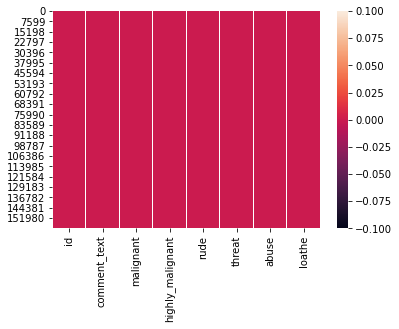

In [14]:
#checking null values using heatmap
sns.heatmap(df_train.isnull())

In [11]:
# Information of the train dataframe.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [12]:
# Information of the test dataframe.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [13]:
# Columns for the train dataframe.
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [15]:
# Dropping column 'id' since it's of no use
df_train.drop(['id'],axis=1,inplace=True)

## EDA

In [16]:
# Check value counts for each feature

cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print(df_train[f'{col}'].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


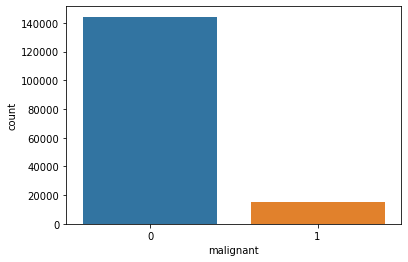

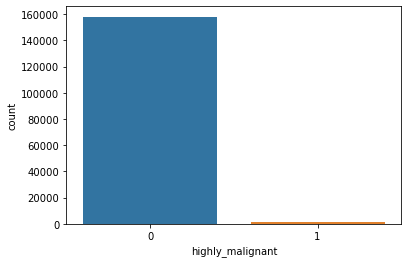

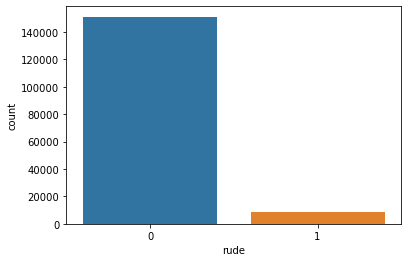

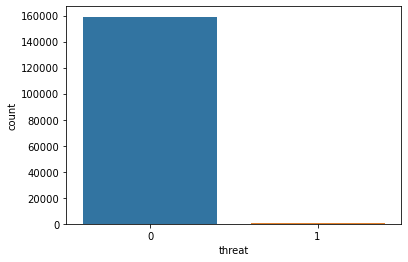

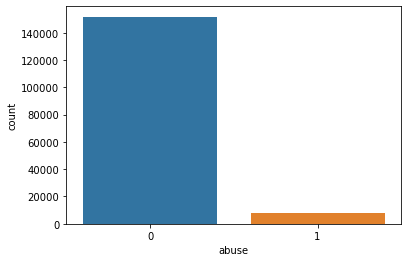

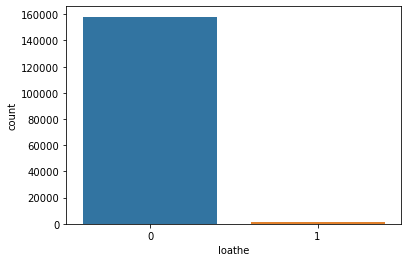

In [18]:
features = df_train.columns[1:]
for i in features:
    sns.countplot(df_train[i])
    plt.show()

Most of the comments are non-negative but still there are some highly malignant, rude and abuse comments.

In [19]:
#number of counts for every target label
counts=df_train.iloc[:,1:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

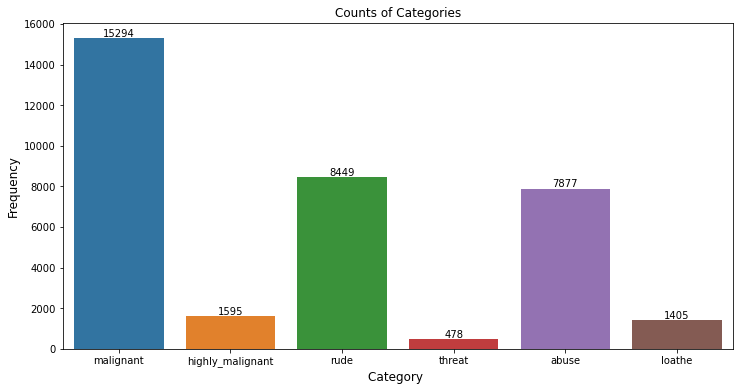

In [21]:
# Let's plot the counts of each category

plt.figure(figsize=(12,6))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

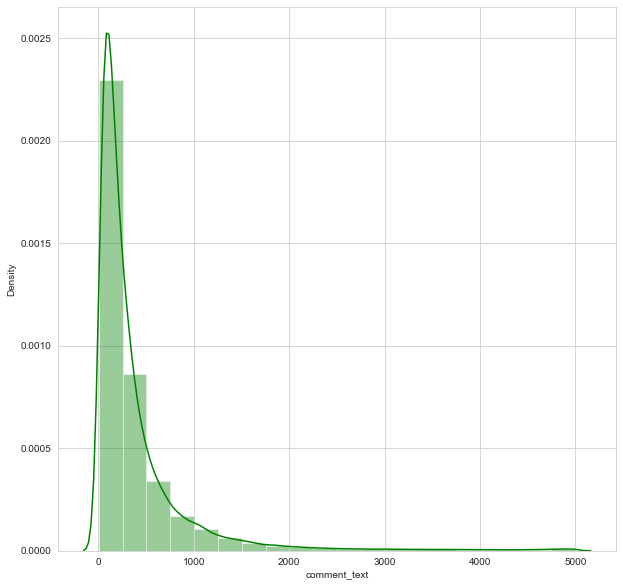

In [22]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'green')

In [25]:
# Let's plot the correlation chart

df_train.corr().style.background_gradient(cmap='Oranges')

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


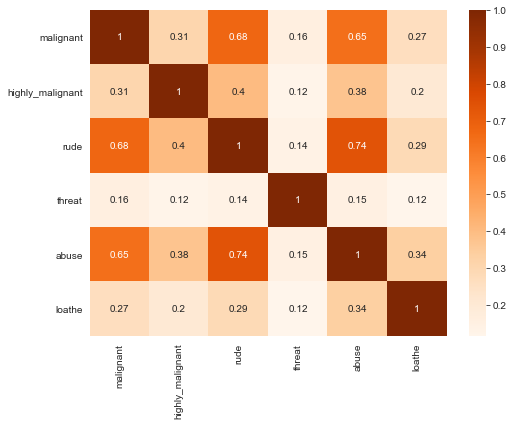

In [27]:
# Let's view the Correlation heatmap among variables

plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot = True, cmap= "Oranges")
plt.show()

No negative correlation in the dataset.

Rude and malignant are correlated.

Likewise, Abuse and rude are correlated each other.

In [30]:
# Creating a new feature having Negative Comments and Non-Negative Comments from all features combinly.
df_train['label'] = df_train[features].max(axis=1)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


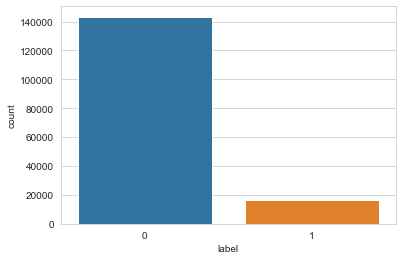

0    143346
1     16225
Name: label, dtype: int64

In [34]:
plt.figure(figsize = (6,4))
sns.countplot(df_train['label'])
plt.show()

df_train['label'].value_counts()

## Pre-Processing

In [43]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [44]:
#Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [45]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)

In [46]:
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0,0
5,congratulation well use tool well talk,0,0,0,0,0,0,0
6,cocksucker piss around work,1,1,1,0,1,0,1
7,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,0
8,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,0
9,alignment subject contrary dulithgow,0,0,0,0,0,0,0


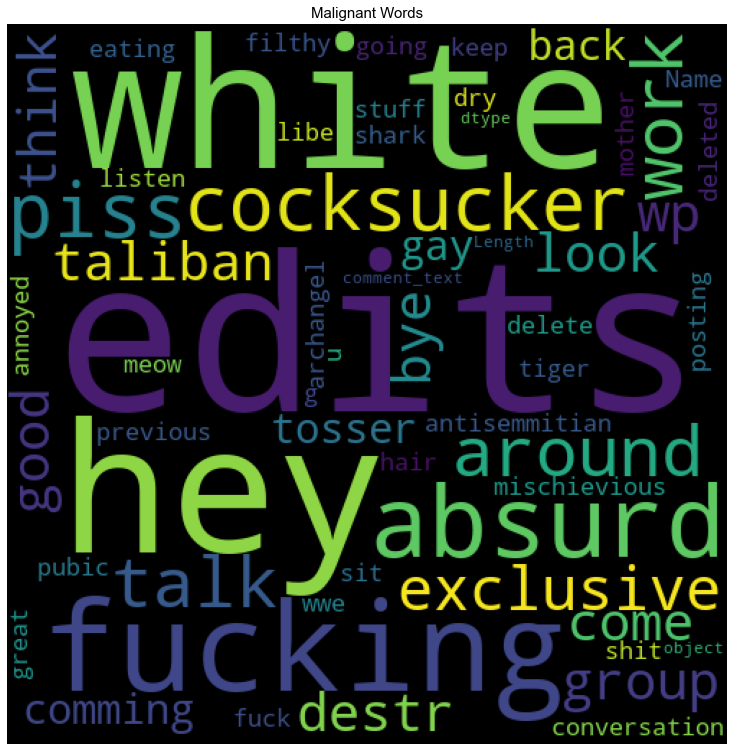

In [49]:
df_train_malignant=df_train[(df_train['malignant']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_train_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Malignant Words',fontdict={'fontsize':15, 'fontweight':10, 'color':'Black'})
plt.show()

The font which is big in size are often used malignant words in this category.



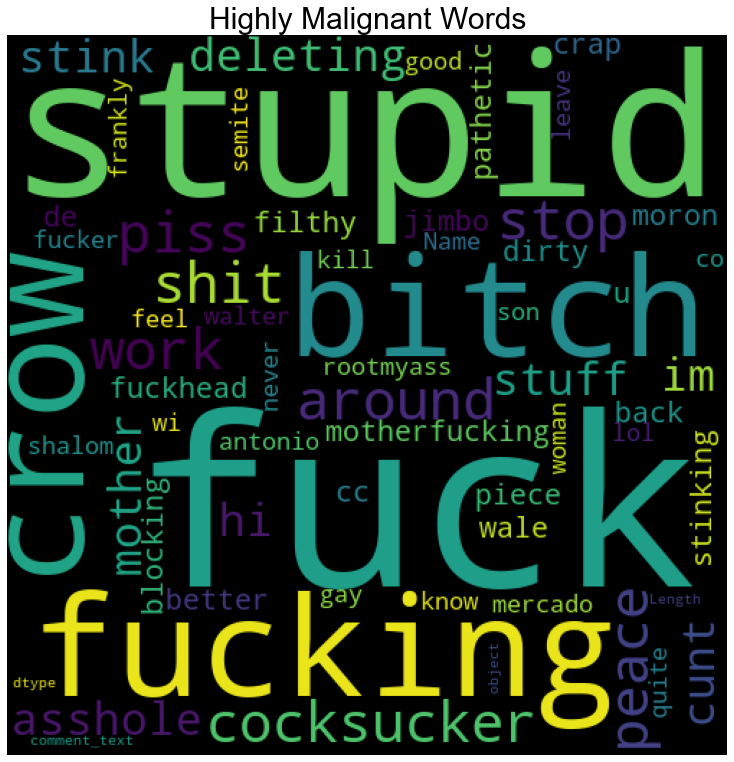

In [50]:
df_train_highlymalignant=df_train[(df_train['highly_malignant']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_train_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Highly Malignant Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used highly malignant words in this category.

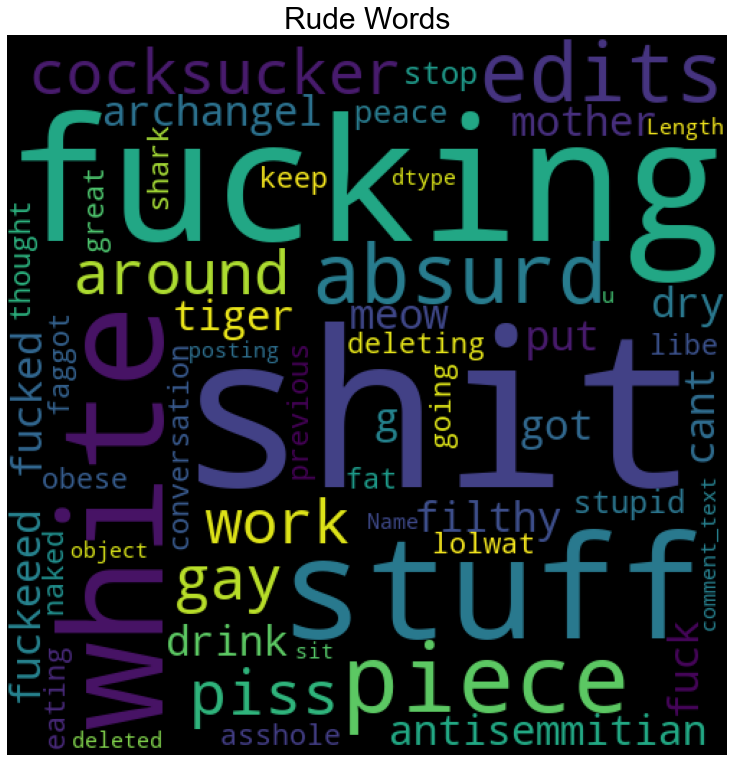

In [51]:
df_train_rude=df_train[(df_train['rude']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_train_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Rude Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used rude words in this category

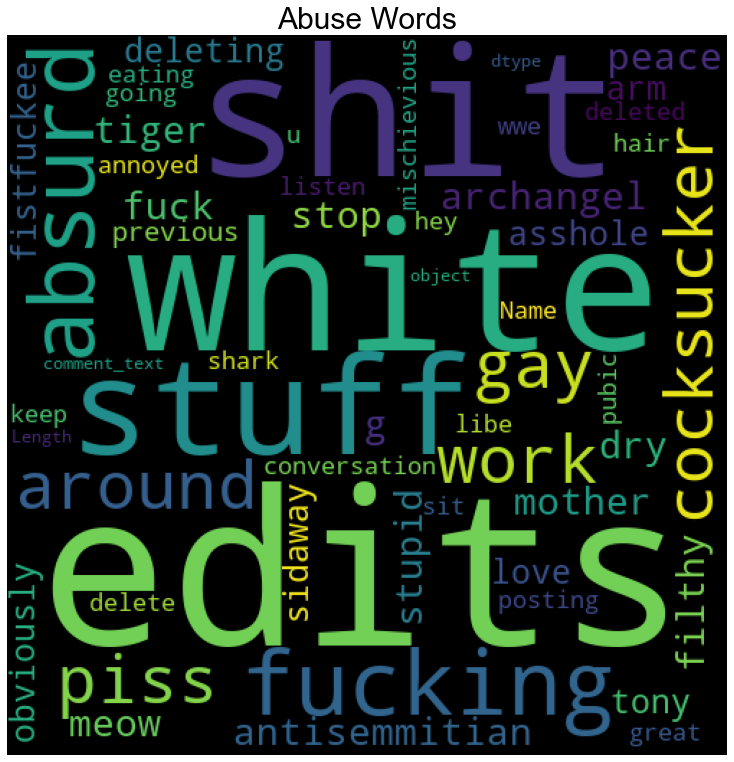

In [52]:
df_train_abuse=df_train[(df_train['abuse']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_train_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Abuse Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used Abused words in this category.

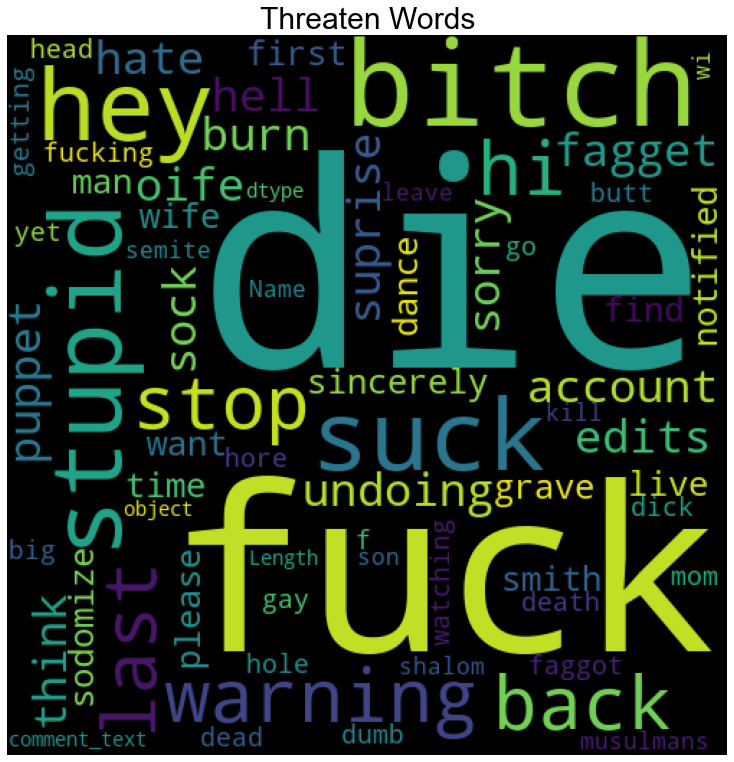

In [53]:
df_train_threat=df_train[(df_train['threat']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_train_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Threaten Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used words for threaten.

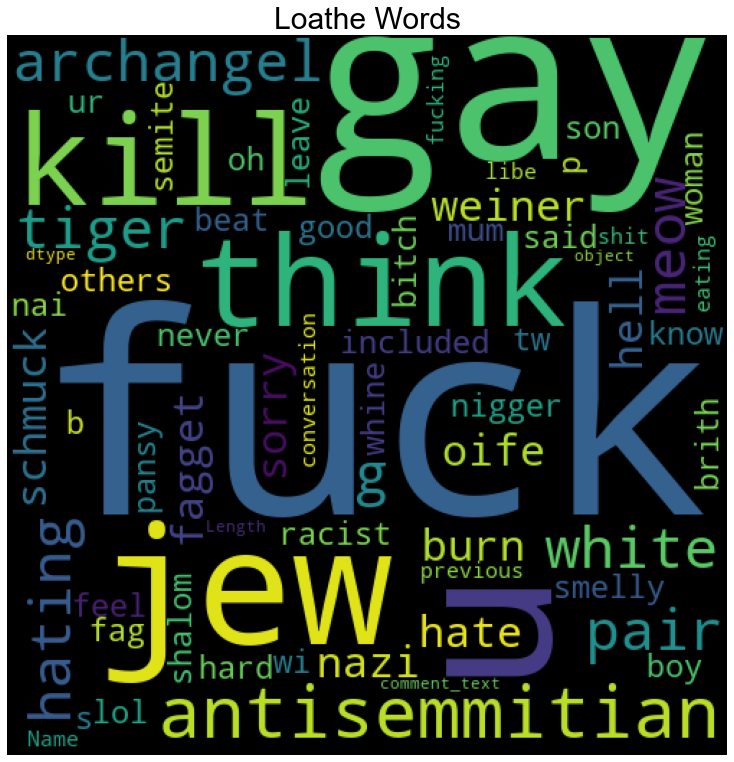

In [54]:
df_train_loathe=df_train[(df_train['loathe']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_train_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Loathe Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()


The font which is big in size are often used as a loathe words in this category.

In [55]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')

In [56]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])

<AxesSubplot:xlabel='label', ylabel='count'>

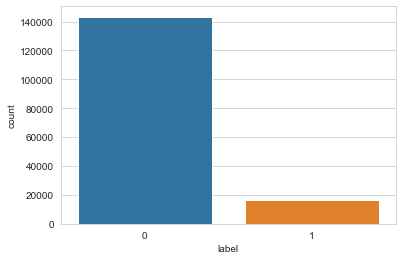

In [58]:
y = df_train['label']
sns.countplot(y)

We can see that label classes are im-balanced and I am uising SMOTE technique to balance the classes.

<AxesSubplot:xlabel='label', ylabel='count'>

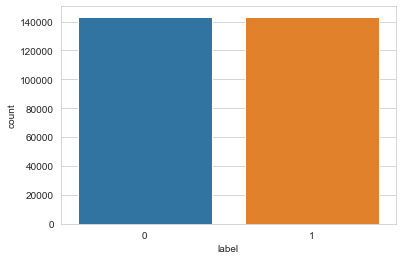

In [59]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,y)
sns.countplot(y_over)

## Model Building

In [63]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = 555)

In [64]:
lor = LogisticRegression()
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
scr_lor = cross_val_score(lor,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_lor.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9320920043811611
CV Score : 0.9313340260855669
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     35600
           1       0.92      0.94      0.93     36073

    accuracy                           0.93     71673
   macro avg       0.93      0.93      0.93     71673
weighted avg       0.93      0.93      0.93     71673

--------------------------------------------------------

Confusion Matrix 
 [[32673  2927]
 [ 2033 34040]]
ROC AUC Score 
 0.9307114790171116


In [65]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
scr_gb = cross_val_score(gb,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_gb.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8067577098159902
CV Score : 0.8335391739704592
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85     35600
           1       0.96      0.70      0.81     36073

    accuracy                           0.83     71673
   macro avg       0.86      0.83      0.83     71673
weighted avg       0.86      0.83      0.83     71673

--------------------------------------------------------

Confusion Matrix 
 [[34451  1149]
 [10907 25166]]
ROC AUC Score 
 0.8326828069766146


In [66]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)  
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_dt.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9472996337794235
CV Score : 0.9483487853559177
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     35600
           1       0.93      0.96      0.95     36073

    accuracy                           0.95     71673
   macro avg       0.95      0.95      0.95     71673
weighted avg       0.95      0.95      0.95     71673

--------------------------------------------------------

Confusion Matrix 
 [[33011  2589]
 [ 1282 34791]]
ROC AUC Score 
 0.9458681175375651


In [67]:
mnb= MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
scr_mnb = cross_val_score(mnb,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_mnb.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8938483307415345
CV Score : 0.8978276387083366
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     35600
           1       0.90      0.88      0.89     36073

    accuracy                           0.89     71673
   macro avg       0.89      0.89      0.89     71673
weighted avg       0.89      0.89      0.89     71673

--------------------------------------------------------

Confusion Matrix 
 [[32195  3405]
 [ 4172 31901]]
ROC AUC Score 
 0.894349782525883


In [68]:
pac = PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
y_pred = pac.predict(x_test)
scr_pac = cross_val_score(pac,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_pac.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9385892897998734
CV Score : 0.9374869473254114
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     35600
           1       0.91      0.97      0.94     36073

    accuracy                           0.94     71673
   macro avg       0.94      0.94      0.94     71673
weighted avg       0.94      0.94      0.94     71673

--------------------------------------------------------

Confusion Matrix 
 [[32240  3360]
 [ 1203 34870]]
ROC AUC Score 
 0.9361344676540735


Out of all models, Passive agressive classifier and Logistic regression model has high CV Score and top of that Passive Aggressive works well.



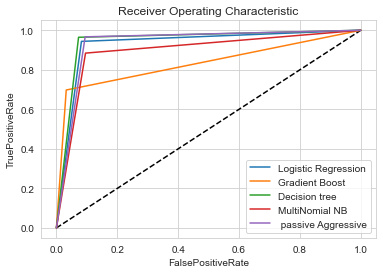

In [69]:
# roc auc curve for all the models

y_pred_prob1 = lor.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = gb.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = dt.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = mnb.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = pac.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Gradient Boost")
plt.plot(fpr3, tpr3, label= "Decision tree")
plt.plot(fpr4, tpr4, label= "MultiNomial NB")
plt.plot(fpr5, tpr5, label = " passive Aggressive")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

## Hyperparameter Tuning 

In [70]:
#Lets try to improve the accuracy of model by hyper parameter tuning,

param = {'C': [1.0,1.2,1.4,1.6,1.8],
        'fit_intercept':[True], 'max_iter': [1000]}

# Applying randomized search CV to increase the accuracy,

rg = RandomizedSearchCV(pac, param_distributions = param, cv= 5)
rg.fit(x_train,y_train)
rg.best_params_

{'max_iter': 1000, 'fit_intercept': True, 'C': 1.0}

In [71]:
#final model accuracy,

model = PassiveAggressiveClassifier(C = 1.0, max_iter = 1000, fit_intercept = True)
                               
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


print("F1 score \n", f1_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9374109423309585
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     35600
           1       0.91      0.97      0.94     36073

    accuracy                           0.94     71673
   macro avg       0.94      0.93      0.93     71673
weighted avg       0.94      0.94      0.93     71673

--------------------------------------------------------

Confusion Matrix 
 [[32150  3450]
 [ 1206 34867]]
ROC AUC Score 
 0.9348288403633456


(2.5, -0.5)

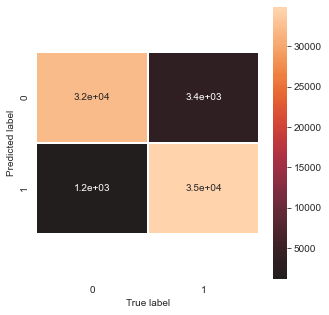

In [72]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,linewidths=1,center=0)
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

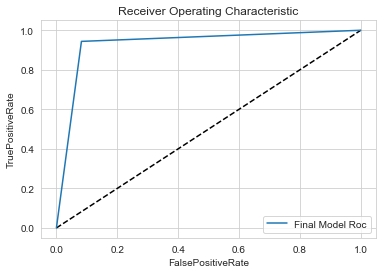

In [73]:
#Roc Curve for final model,

y_pred_fin = model.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final Model Roc")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()


In [75]:
import joblib
joblib.dump(model,"Malignant_Comment_Predict.pkl")

['Malignant_Comment_Predict.pkl']

## Prediction

In [76]:
#aplying to test data,

df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
test = tf_vec.fit_transform(df_test['comment_text'])

In [82]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland
3,00017563c3f7919a,look back source information updated correct f...
4,00017695ad8997eb,anonymously edit article


In [77]:
#Loading the test data

mod = joblib.load("Malignant_Comment_Predict.pkl")
prediction = mod.predict(test)
prediction = pd.DataFrame(prediction)

In [78]:
# To get the data in CSV format,

prediction.to_csv("Malignant_Classifier_Comments_Prediction.csv", index = 'False')